X の最初の5要素: [50.         47.49974997 45.11739857 42.84944482 40.69219195]
Y の最初の5要素: [200.         200.50005001 200.87601266 201.13302902 201.27632272]


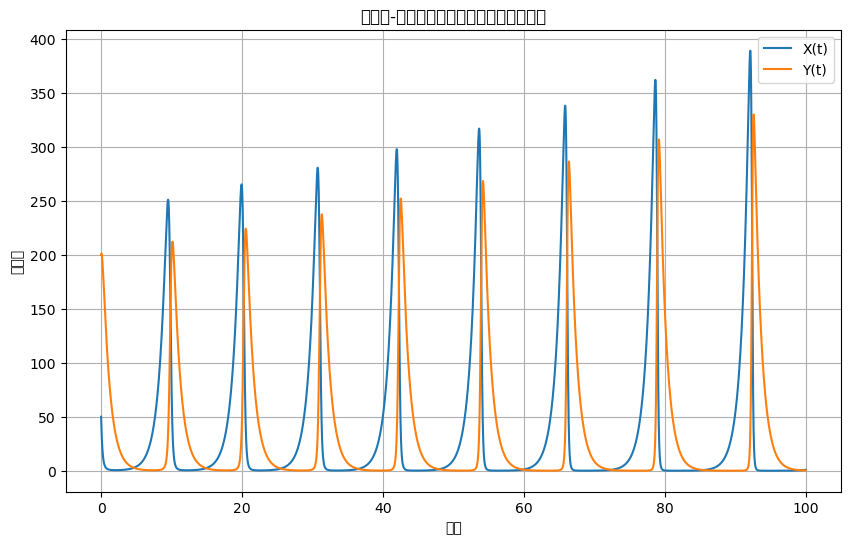

テストが正常に完了しました。


In [8]:
import numpy as np

def solve_system(a, b, c, d, X0, Y0, t, dXdt, dYdt):
    """
    システムを解く関数
    dXdt(X, Y, a, b):
        Xの変化率を計算する関数
    dYdt(X, Y, c, d):
        Yの変化率を計算する関数
    """
    # 時間ステップの計算
    dt = t[1] - t[0]
    
    # 結果を格納するリストの初期化
    X = [X0]
    Y = [Y0]
    
    # オイラー法のループ
    for i in range(1, len(t)):
        X_new = X[-1] + dt * dXdt(X[-1], Y[-1], a, b)
        Y_new = Y[-1] + dt * dYdt(X[-1], Y[-1], c, d)
        X.append(X_new)
        Y.append(Y_new)
    
    return np.array(X), np.array(Y)

# dXdt と dYdt の定義
def dXdt(X, Y, a, b):
    return a*X - b*X*Y

def dYdt(X, Y, c, d):
    return -c*Y + d*X*Y

# コードのテスト
if __name__ == "__main__":
    # パラメータの設定
    a, b, c, d = 1.0, 0.03, 1.0, 0.025
    X0, Y0 = 200, 50
    t = np.linspace(0, 100, 10000)

    # システムを解く
    X, Y = solve_system(a, b, c, d, X0, Y0, t, dXdt, dYdt)

    # 結果の表示
    print("X の最初の5要素:", X[:5])
    print("Y の最初の5要素:", Y[:5])

    # 結果のプロット
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(t, X, label='X(t)')
    plt.plot(t, Y, label='Y(t)')
    plt.xlabel('時間')
    plt.ylabel('個体数')
    plt.title('捕食者-被食者モデルのシミュレーション')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("テストが正常に完了しました。")
